In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from collections import Counter

#import colorlover as cl

from IPython.display import HTML, display

from chorogrid import Colorbin, Chorogrid

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
TOPIC_MAPPING={
    "GunControl": "Gun Control",
    "Privacy": "Privacy",
    "Vaccine": "Vaccine",
    "ChildEducation": "Child Education",
    "SkinDamage": "Skin Damage",
    "SeatBelt": "Seat Belt"
}
topic_order=["Gun Control", "Privacy", "Vaccine",
             "Child Education", "Skin Damage", "Seat Belt"]
df = pd.read_hdf("FINAL_ANALYSIS_DATA.h5", "final_data").rename(columns={
        #u'is_controvertial': u'is_controversial'
    }).assign(
    topic_name=lambda x: x.topic_name.apply(lambda k: TOPIC_MAPPING[k.split('/')[0]]),
)
NON_STATES = set(["UNK", "USA", "AS", "DC", "GU",
              "MP", "PR", "VI"])


STATE_POPULATIONS="""4863300.00	AL
741894.00	AK
6931071.00	AZ
2988248.00	AR
39250017.00	CA
5540545.00	CO
3576452.00	CT
952065.00	DE
681170.00	DC
20612439.00	FL
10310371.00	GA
1428557.00	HI
1683140.00	ID
12801539.00	IL
6633053.00	IN
3134693.00	IA
2907289.00	KS
4436974.00	KY
4681666.00	LA
1331479.00	ME
6016447.00	MD
6811779.00	MA
9928300.00	MI
5519952.00	MN
2988726.00	MS
6093000.00	MO
1042520.00	MT
1907116.00	NE
2940058.00	NV
1334795.00	NH
8944469.00	NJ
2081015.00	NM
19745289.00	NY
10146788.00	NC
757952.00	ND
11614373.00	OH
3923561.00	OK
4093465.00	OR
12784227.00	PA
1056426.00	RI
4961119.00	SC
865454.00	SD
6651194.00	TN
27862596.00	TX
3051217.00	UT
624594.00	VT
8411808.00	VA
7288000.00	WA
1831102.00	WV
5778708.00	WI
585501.00	WY
""".splitlines()

STATE_POPULATIONS = {k:float(v) for v,k in map(lambda x: x.split('\t'), STATE_POPULATIONS)}


STATE_NAMES_ABBR="""AK	Alaska
AL	Alabama
AR	Arkansas
AZ	Arizona
CA	California
CO	Colorado
CT	Connecticut
DC	Dist. of Col.
DE	Delaware
FL	Florida
GA	Georgia
GU	Guam
HI	Hawaii
IA	Iowa
ID	Idaho
IL	Illinois
IN	Indiana
KS	Kansas
KY	Kentucky
LA	Louisiana
MA	Massachusetts
MD	Maryland
ME	Maine
MI	Michigan
MN	Minnesota
MO	Missouri
MS	Mississippi
MT	Montana
NC	North Carolina
ND	North Dakota
NE	Nebraska
NH	New Hampshire
NJ	New Jersey
NM	New Mexico
NV	Nevada
NY	New York
OH	Ohio
OK	Oklahoma
OR	Oregon
PA	Pennsylvania
PR	Puerto Rico
RI	Rhode Island
SC	South Carolina
SD	South Dakota
TN	Tennessee
TX	Texas
UT	Utah
VA	Virginia
VI	Virgin Islands
VT	Vermont
WA	Washington
WI	Wisconsin
WV	West Virginia
WY	Wyoming""".splitlines()
STATE_NAMES_ABBR = {
    k: v for v,k in map(lambda x: x.split("\t"), STATE_NAMES_ABBR)
}

## Source: http://www.presidency.ucsb.edu/showelection.php?year=2016

STATE_VOTES="""STATE	TOTAL VOTES	Hillary Votes	%	EV	Trump Votes	%	EV	Other Votes	%	EV
Alabama	2,123,372	729,547	34.4%	 	1,318,255	62.1%	9	44,467	2.1%	 
Alaska	318,608	116,454	36.6%	 	163,387	51.3%	3	18,725	5.9%	 
Arizona	2,573,165	1,161,167	45.1%	 	1,252,401	48.7%	11	106,327	4.1%	 
Arkansas	1,130,635	380,494	33.7%	 	684,872	60.6%	6	29,829	2.6%	 
California	14,181,595	8,753,788	61.7%	55	4,483,810	31.6%	 	478,500	3.4%	 
Colorado	2,780,220	1,338,870	48.2%	9	1,202,484	43.3%	 	144,121	5.2%	 
Connecticut	1,644,920	897,572	54.6%	7	673,215	40.9%	 	48,676	3.0%	 
Delaware	441,590	235,603	53.4%	3	185,127	41.9%	 	14,757	3.3%	 
Dist. of Col.	311,268	282,830	90.9%	3	12,723	4.1%	 	4,906	1.6%	 
Florida	9,420,039	4,504,975	47.8%	 	4,617,886	49.0%	29	207,043	2.2%	 
Georgia	4,092,373	1,877,963	45.9%	 	2,089,104	51.0%	16	125,306	3.1%	 
Hawaii	428,937	266,891	62.2%	3*	128,847	30.0%	 	15,954	3.7%	 
Idaho	690,255	189,765	27.5%	 	409,055	59.3%	4	28,331	4.1%	 
Illinois	5,536,424	3,090,729	55.8%	20	2,146,015	38.8%	 	209,596	3.8%	 
Indiana	2,734,958	1,033,126	37.8%	 	1,557,286	56.9%	11	133,993	4.9%	 
Iowa	1,566,031	653,669	41.7%	 	800,983	51.1%	6	59,186	3.8%	 
Kansas	1,184,402	427,005	36.1%	 	671,018	56.7%	6	55,406	4.7%	 
Kentucky	1,924,149	628,854	32.7%	 	1,202,971	62.5%	8	53,752	2.8%	 
Louisiana	2,029,032	780,154	38.4%	 	1,178,638	58.1%	8	37,978	1.9%	 
Maine	747,927	357,735	47.8%	3	335,593	44.9%	1	38,105	5.1%	 
Maryland	2,781,446	1,677,928	60.3%	10	943,169	33.9%	 	79,605	2.9%	 
Massachusetts	3,325,046	1,995,196	60.0%	11	1,090,893	32.8%	 	138,018	4.2%	 
Michigan	4,799,284	2,268,839	47.3%	 	2,279,543	47.5%	16	172,136	3.6%	 
Minnesota	2,944,813	1,367,716	46.4%	10	1,322,951	44.9%	 	112,972	3.8%	 
Mississippi	1,209,357	485,131	40.1%	 	700,714	57.9%	6	14,435	1.2%	 
Missouri	2,808,605	1,071,068	38.1%	 	1,594,511	56.8%	10	97,359	3.5%	 
Montana	494,526	177,709	35.9%	 	279,240	56.5%	3	28,037	5.7%	 
Nebraska	844,227	284,494	33.7%	 	495,961	58.7%	2	38,946	4.6%	 
Nevada	1,125,385	539,260	47.9%	6	512,058	45.5%	 	37,384	3.3%	 
New Hampshire	744,296	348,526	46.8%	4	345,790	46.5%	 	30,777	4.1%	 
New Jersey	3,874,046	2,148,278	55.5%	14	1,601,933	41.4%	 	72,477	1.9%	 
New Mexico	798,318	385,234	48.3%	5	319,666	40.0%	 	74,541	9.3%	 
New York	7,721,453	4,556,124	59.0%	29	2,819,534	36.5%	 	176,598	2.3%	 
North Carolina	4,741,564	2,189,316	46.2%	 	2,362,631	49.8%	15	130,126	2.7%	 
North Dakota	344,360	93,758	27.2%	 	216,794	63.0%	3	21,434	6.2%	 
Ohio	5,496,487	2,394,164	43.6%	 	2,841,005	51.7%	18	174,498	3.2%	 
Oklahoma	1,452,992	420,375	28.9%	 	949,136	65.3%	7	83,481	5.7%	 
Oregon	2,001,336	1,002,106	50.1%	7	782,403	39.1%	 	94,231	4.7%	 
Pennsylvania	6,115,402	2,926,441	47.9%	 	2,970,733	48.6%	20	146,715	2.4%	 
Rhode Island	464,144	252,525	54.4%	4	180,543	38.9%	 	14,746	3.2%	 
South Carolina	2,103,027	855,373	40.7%	 	1,155,389	54.9%	9	49,204	2.3%	 
South Dakota	370,093	117,458	31.7%	 	227,721	61.5%	3	20,850	5.6%	 
Tennessee	2,508,027	870,695	34.7%	 	1,522,925	60.7%	11	70,397	2.8%	 
Texas	8,969,226	3,877,868	43.2%	 	4,685,047	52.2%	36*	283,492	3.2%	 
Utah	1,131,430	310,676	27.5%	 	515,231	45.5%	6	39,608	3.5%	 
Vermont	315,067	178,573	56.7%	3	95,369	30.3%	 	10,078	3.2%	 
Virginia	3,982,752	1,981,473	49.8%	13	1,769,443	44.4%	 	118,274	3.0%	 
Washington	3,209,214	1,742,718	54.3%	8*	1,221,747	38.1%	 	160,879	5.0%	 
West Virginia	713,051	188,794	26.5%	 	489,371	68.6%	5	23,004	3.2%	 
Wisconsin	2,976,150	1,382,536	46.5%	 	1,405,284	47.2%	10	106,674	3.6%	 
Wyoming	255,849	55,973	21.9%	 	174,419	68.2%	3	13,287	5.2%""".splitlines()
STATE_VOTES = list(map(lambda x: x.replace(",", "").replace("%", "").split("\t"), STATE_VOTES))

STATE_COLORS={
    STATE_NAMES_ABBR[x[0]]: "b" if int(x[2]) > int(x[5]) else "r"
    for x in STATE_VOTES[1:]
}

print(STATE_COLORS)



CHOROGRID_STATES_FILE='/content/Code/smishra8/chorogrid/chorogrid/databases/usa_states.csv'


def logit_transform(p):
    eps = 1e-8
    return np.log((p + eps)/(1-p + eps))

{'WA': 'b', 'DE': 'b', 'DC': 'b', 'WI': 'r', 'WV': 'r', 'HI': 'b', 'FL': 'r', 'WY': 'r', 'NH': 'b', 'NJ': 'b', 'NM': 'b', 'TX': 'r', 'LA': 'r', 'NC': 'r', 'ND': 'r', 'NE': 'r', 'TN': 'r', 'NY': 'b', 'PA': 'r', 'CA': 'b', 'NV': 'b', 'VA': 'b', 'CO': 'b', 'AK': 'r', 'AL': 'r', 'AR': 'r', 'VT': 'b', 'IL': 'b', 'GA': 'r', 'IN': 'r', 'IA': 'r', 'OK': 'r', 'AZ': 'r', 'ID': 'r', 'CT': 'b', 'ME': 'b', 'MD': 'b', 'MA': 'b', 'OH': 'r', 'UT': 'r', 'MO': 'r', 'MN': 'b', 'MI': 'r', 'RI': 'b', 'KS': 'r', 'MT': 'r', 'MS': 'r', 'SC': 'r', 'KY': 'r', 'OR': 'b', 'SD': 'r'}


In [4]:
STATE_POPULATIONS["AZ"]

6931071.0

In [5]:
df.columns

Index([          u'Author',       u'City/Urban',  u'City/Urban Area',
               u'Contents',             u'Date',        u'Followers',
              u'Following',             u'GUID',           u'Gender',
                   u'Name',            u'Posts',              u'RT?',
           u'State/Region',              u'URL',             u'URL?',
              u'adjective',           u'adverb',      u'count_tweet',
               u'hashtag?',         u'mention?',         u'negation',
                   u'noun',      u'preposition',    u'processedPost',
              u'sentiment',   u'sentiment_subj', u'subjectvity_type',
                   u't_id',       u'topic_name',             u'verb',
              u't_created',       u't_retweets',      u't_favorites',
             u't_is_reply',       u't_is_quote',     u't_n_hashtags',
               u't_n_urls',     u't_n_mentions',        u't_n_media',
                   u'u_id',        u'u_created',       u'u_n_listed',
          u'u_n_favo

In [6]:
df.CATS.fillna(0).apply(
    lambda x: Counter(['UNK']) 
    if x == 0 
    else Counter(x)
).apply(lambda x: len(x)).describe()

count    246869.000000
mean          1.139163
std           0.356983
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: CATS, dtype: float64

In [7]:
df["CATS_Counter"] = df.CATS.fillna(0).apply(
    lambda x: Counter(['NONE']) 
    if x == 0 
    else Counter(x)
)
df[df.CATS_Counter.apply(lambda x: len(x)) == 2]["CATS_Counter"].head()

23     {u'socialmedia': 1, u'videos': 1}
29    {u'twitter': 1, u'socialmedia': 1}
38     {u'socialmedia': 1, u'videos': 1}
53     {u'socialmedia': 1, u'videos': 1}
54    {u'twitter': 1, u'socialmedia': 1}
Name: CATS_Counter, dtype: object

## Estimation of population normalized proportion

### Model estimation

We observe a certain proportion. We assume that that observed proportion can be explained away by population. The remaining will be explained away by state specific factors.

$$
\begin{equation}
log\left(\frac{p_{obs}}{1-p_{obs}}\right) = f(population) + \beta_{state}\\
\implies p_{obs} = \sigma(f(population) + \beta_{state})
\end{equation}
$$


Now we estimate the observed using population. 


$$
\begin{equation}
p_{obs} = p_{population} = \sigma(f(population))\\
\implies \beta_{state} = log\left(\frac{p_{obs}}{1-p_{obs}}\right) - log\left(\frac{p_{population}}{1-p_{population}}\right)\\
\implies p_{state} = \sigma(\beta_{state})
\end{equation}
$$







In [8]:
def plot_by_topic(df, nstates=10):
    url_types = ["fakenews", "news",]
    ncols = len(topic_order[:3])
    nrows = len(url_types)
    w, h = 10, 5
    fig, ax = plt.subplots(
        nrows, ncols,
        sharex=True,
        sharey="row",
        figsize=(ncols*w,nrows*h)
    )
    for ui, url_type in enumerate(url_types):
        print ui, url_type
        for i, topic in enumerate(topic_order[:3]):
            print i, topic
            df_t = (
                df[
                    (df.u_state != "USA") 
                  & (df.t_n_urls > 0)
                  & (df.topic_name == topic)
                ]
                .assign(**{
                    url_type: lambda x: x.CATS_Counter.apply(lambda k: k.get(url_type, 0))
                })
                [["u_state", url_type]].groupby("u_state")[url_type]
                .agg([np.sum, len, np.mean])
                .reset_index()
                .rename(columns={
                    "sum": "success",
                    "len": "total",
                    "mean": "proportion"
                })
                .assign(
                    failure=lambda x: x["total"] - x["success"],
                    population=lambda x: x.u_state.map(STATE_POPULATIONS, 1),
                )
                .dropna()
                .assign(
                    log_odds=lambda x: logit_transform(x["proportion"]),
                    #population=lambda x: np.log10(x["population"])
                )
            )
            display(df_t.sort_values("proportion", ascending=False).head(10))
            X, Y = df_t.population.values, df_t.proportion.values
            ax[ui, i].plot(X, Y, "ko", ms=5)
            overall_p = df_t.success.sum()*1./df_t.total.sum()
            #ax[i].axhline(y=logit_transform(overall_p), ls="--", color="0.5")
            ax[ui, i].axhline(y=overall_p, ls="--", lw=1, color="0.5")
            #ax[i, ui].set_xlabel("$log_{10}(population)$")
            ax[ui, i].set_xscale("log")
            ax[ui, i].set_ylabel("$p(url={})$".format(url_type))
            ax[ui, i].set_title(topic)
            for j, state in enumerate(df_t.u_state.values):
                ax[ui, i].text(X[j], Y[j], state, fontsize=12, color=STATE_COLORS[state], alpha=0.8)
        #fig.suptitle(url_type.upper(), fontsize=16)
        #plt.subplots_adjust(hspace=0.2, wspace=0.3)
    sns.despine(offset=10)
    fig.tight_layout()
nstates=None

0 fakenews
0 Gun Control


,u_state,success,total,proportion,failure,population,log_odds
43,SD,5,10,0.500000,5,865454.0,0.000000
0,AK,5,14,0.357143,9,741894.0,-0.587787
1,AL,32,130,0.246154,98,4863300.0,-1.119232
51,WV,4,20,0.200000,16,1831102.0,-1.386294
50,WI,41,206,0.199029,165,5778708.0,-1.392373
47,VA,61,330,0.184848,269,8411808.0,-1.483837
13,IA,12,67,0.179104,55,3134693.0,-1.522426
10,FL,126,707,0.178218,581,20612439.0,-1.528469
45,TX,167,938,0.178038,771,27862596.0,-1.529695
44,TN,29,165,0.175758,136,6651194.0,-1.545359


1 Privacy


,u_state,success,total,proportion,failure,population,log_odds
0,AK,8,41,0.195122,33,741894.0,-1.417066
1,AL,33,219,0.150685,186,4863300.0,-1.729239
21,ME,9,88,0.102273,79,1331479.0,-2.172223
12,IA,12,139,0.086331,127,3134693.0,-2.359280
32,NJ,43,500,0.086000,457,8944469.0,-2.363483
27,MT,4,47,0.085106,43,1042520.0,-2.374906
50,WI,20,257,0.077821,237,5778708.0,-2.472328
51,WV,2,26,0.076923,24,1831102.0,-2.484907
23,MN,15,200,0.075000,185,5519952.0,-2.512306
9,FL,92,1252,0.073482,1160,20612439.0,-2.534387


2 Vaccine


,u_state,success,total,proportion,failure,population,log_odds
32,NM,14,57,0.245614,43,2081015.0,-1.122143
5,CO,51,232,0.219828,181,5540545.0,-1.266671
33,NV,38,176,0.215909,138,2940058.0,-1.289667
21,ME,14,74,0.189189,60,1331479.0,-1.455287
49,WI,37,197,0.187817,160,5778708.0,-1.464256
3,AZ,47,265,0.177358,218,6931071.0,-1.534347
0,AK,3,17,0.176471,14,741894.0,-1.540445
13,ID,7,40,0.175000,33,1683140.0,-1.550597
6,CT,15,90,0.166667,75,3576452.0,-1.609438
31,NJ,53,336,0.157738,283,8944469.0,-1.675155


1 news
0 Gun Control


,u_state,success,total,proportion,failure,population,log_odds
8,DC,194,429,0.452214,235,681170.0,-0.191727
2,AR,24,68,0.352941,44,2988248.0,-0.606136
35,NY,394,1154,0.341421,760,19745289.0,-0.656968
29,ND,2,6,0.333333,4,757952.0,-0.693147
48,VT,7,21,0.333333,14,624594.0,-0.693147
15,IL,132,421,0.313539,289,12801539.0,-0.783625
12,HI,9,29,0.310345,20,1428557.0,-0.798508
49,WA,122,394,0.309645,272,7288000.0,-0.801781
6,CO,73,239,0.305439,166,5540545.0,-0.821528
0,AK,4,14,0.285714,10,741894.0,-0.916291


1 Privacy


,u_state,success,total,proportion,failure,population,log_odds
8,DE,10,22,0.454545,12,952065.0,-0.182322
48,VT,16,48,0.333333,32,624594.0,-0.693147
28,NC,168,508,0.330709,340,10146788.0,-0.704982
24,MO,62,189,0.328042,127,6093000.0,-0.717053
11,HI,27,84,0.321429,57,1428557.0,-0.747214
7,DC,574,1846,0.310943,1272,681170.0,-0.795716
19,MA,184,607,0.303130,423,6811779.0,-0.832436
31,NH,31,103,0.300971,72,1334795.0,-0.842679
29,ND,3,10,0.300000,7,757952.0,-0.847298
33,NM,18,61,0.295082,43,2081015.0,-0.870828


2 Vaccine


,u_state,success,total,proportion,failure,population,log_odds
42,SD,4,10,0.400000,6,865454.0,-0.405465
19,MA,154,447,0.344519,293,6811779.0,-0.643220
32,NM,17,57,0.298246,40,2081015.0,-0.855666
0,AK,5,17,0.294118,12,741894.0,-0.875469
20,MD,64,230,0.278261,166,6016447.0,-0.953105
12,IA,20,72,0.277778,52,3134693.0,-0.955511
7,DC,106,385,0.275325,279,681170.0,-0.967773
40,RI,11,40,0.275000,29,1056426.0,-0.969401
34,NY,456,1660,0.274699,1204,19745289.0,-0.970912
29,NE,10,37,0.270270,27,1907116.0,-0.993252


/homed/content/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


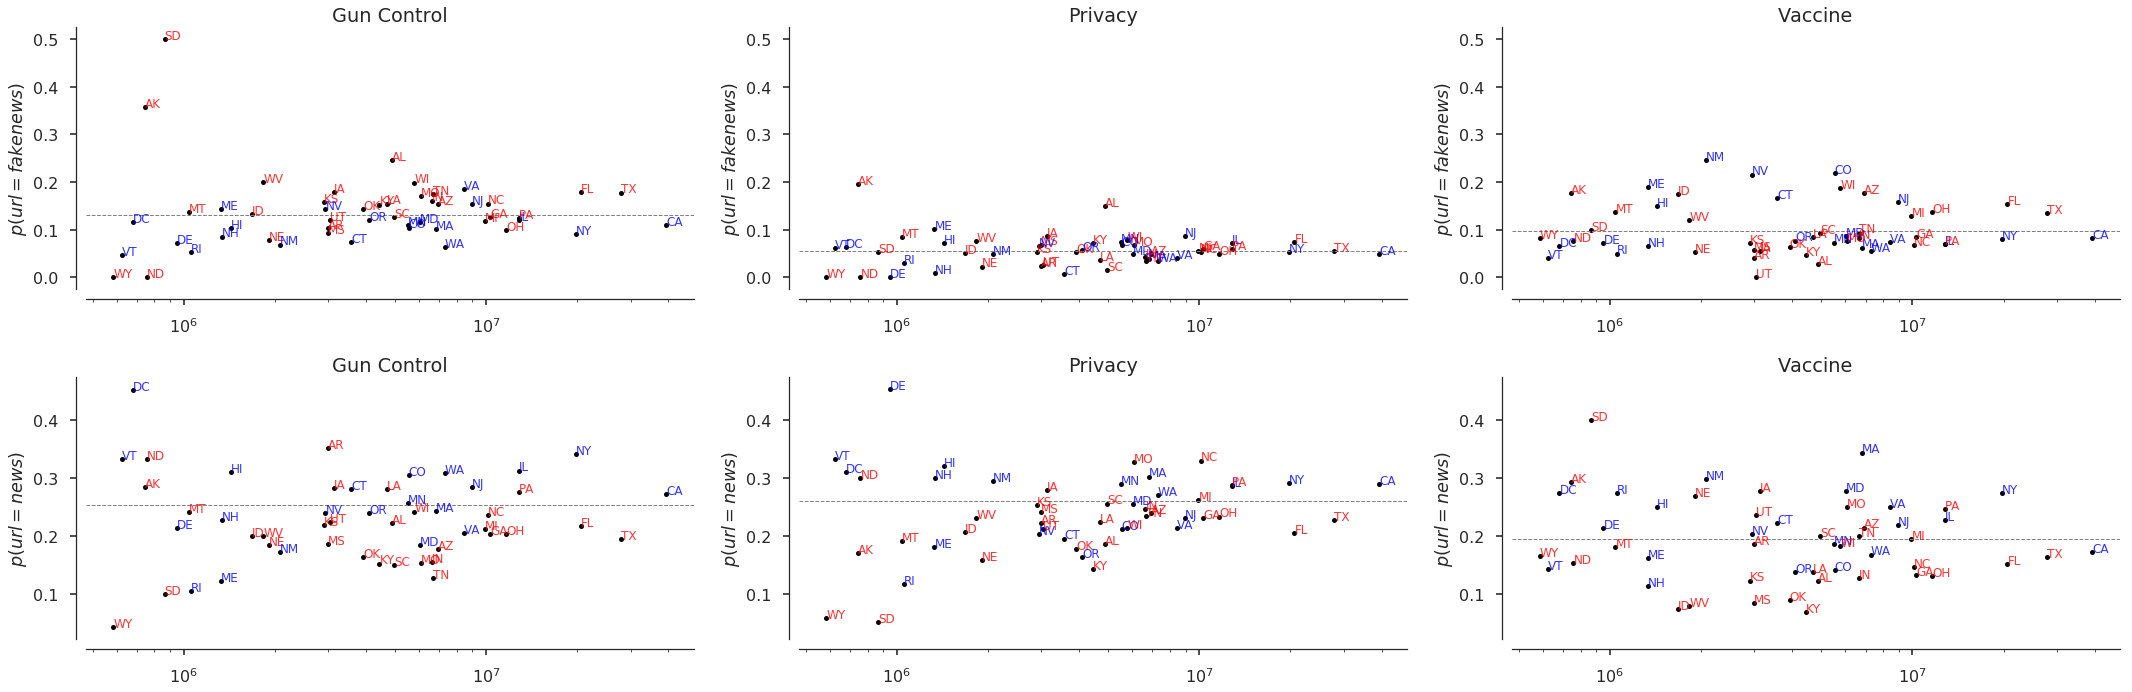

In [9]:
plot_by_topic(df, nstates=nstates)

In [10]:
pd.Series(STATE_COLORS.values()).value_counts()

r    30
b    21
dtype: int64

In [11]:
df[
    (df.u_state != "USA")
  & (~df.u_state.isnull()) 
  & (df.t_n_urls > 0)
  #& (df.topic_name == topic)
].assign(state_color=lambda x: x.u_state.map(STATE_COLORS)).groupby("state_color").t_n_urls.count()

state_color
b    38521
r    29255
Name: t_n_urls, dtype: int64